In [27]:
if (!require("igraph")) install.packages('igraph')
if (!require("Matrix")) install.packages('Matrix')
if (!require("pracma")) install.packages('pracma')
if (!require("igraph")) install.packages('igraph')
if (!require("entropy")) install.packages('entropy')
if (!require("infotheo")) install.packages('infotheo')

Loading required package: entropy

Loading required package: infotheo


Attaching package: 'infotheo'


The following objects are masked from 'package:entropy':

    discretize, entropy




### Question 18

In [3]:
files = list.files(path="gplus/", pattern="*.circles")
morethan_2_count = 0
for (file in files) {
    count = length(unique(gsub("\\..*", "", files)))
    
    circle = paste("gplus/", file, sep="")
    if (length(readLines(circle)) > 2) {
        morethan_2_count = morethan_2_count + 1
    }
}

cat(paste("Number of personal networks:", count))
cat("\n")
cat(paste("Number of personal networks of users who have more than 2 circles:", morethan_2_count))

Number of personal networks: 132
Number of personal networks of users who have more than 2 circles: 57

### Question 19 & 20

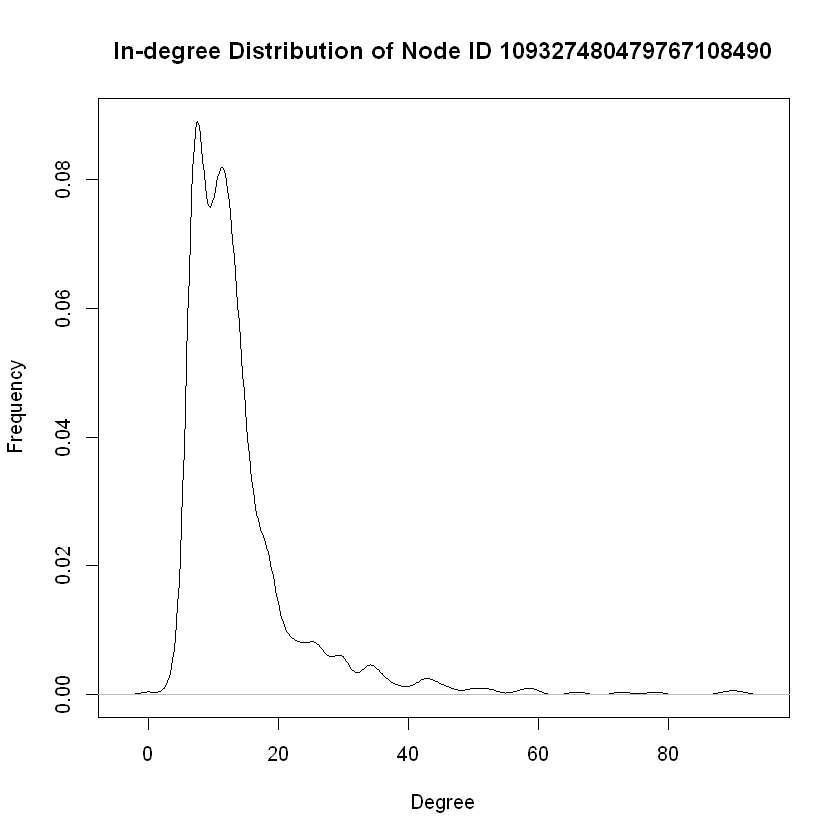

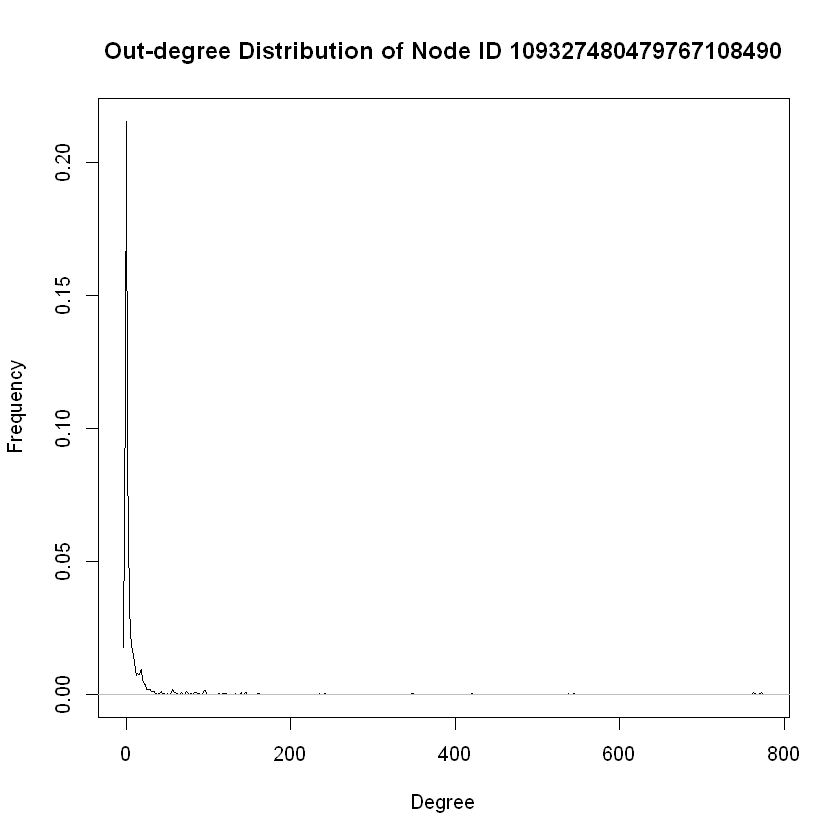

Modularity score of Node ID 109327480479767108490 : 0.252765387296677

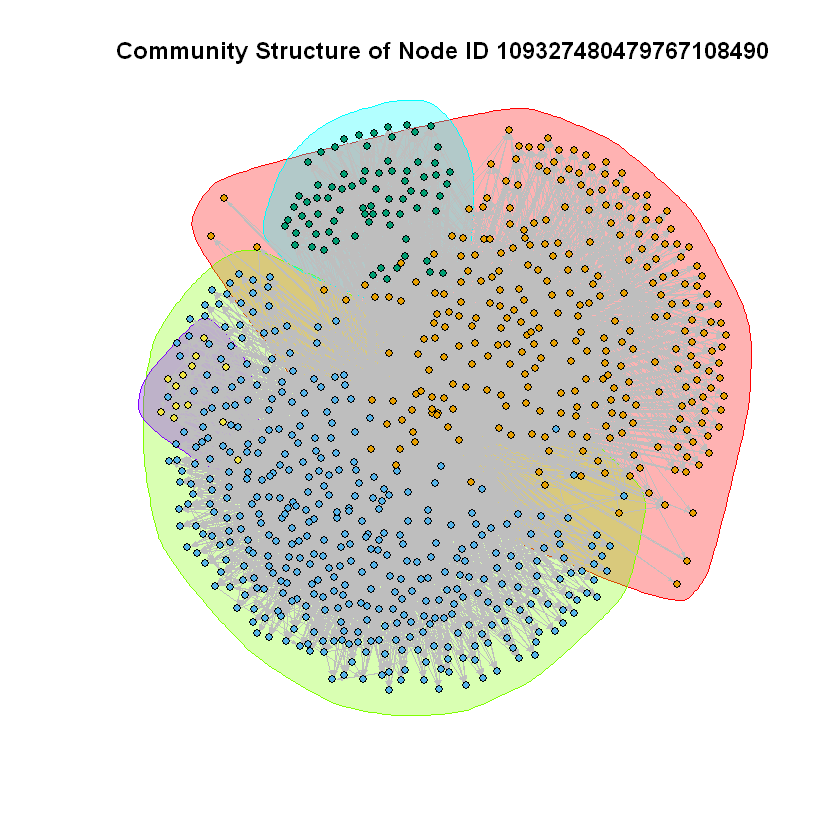

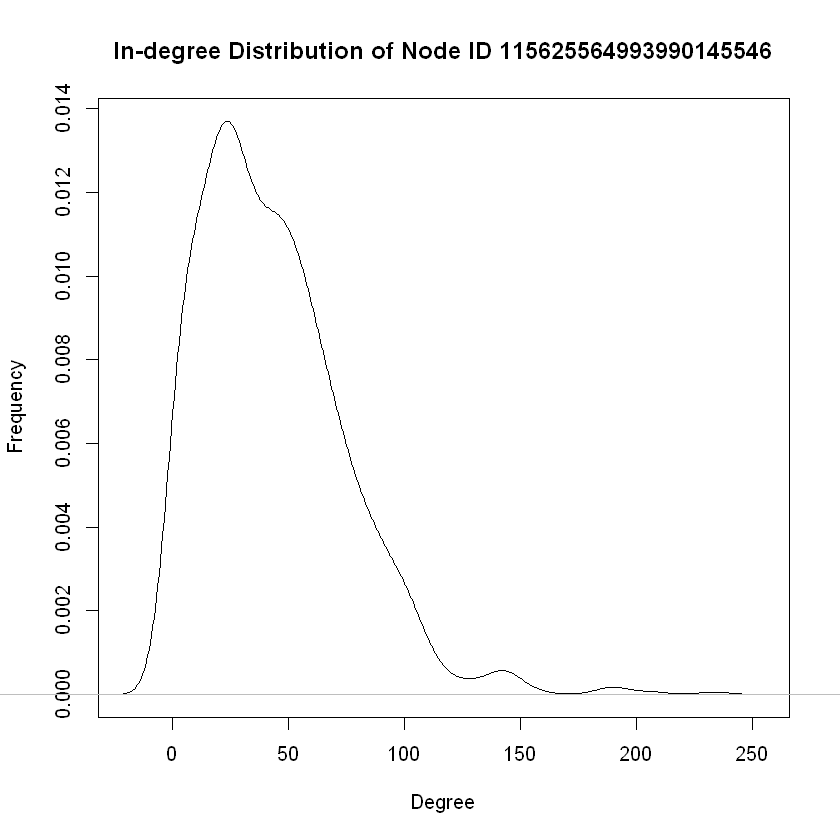

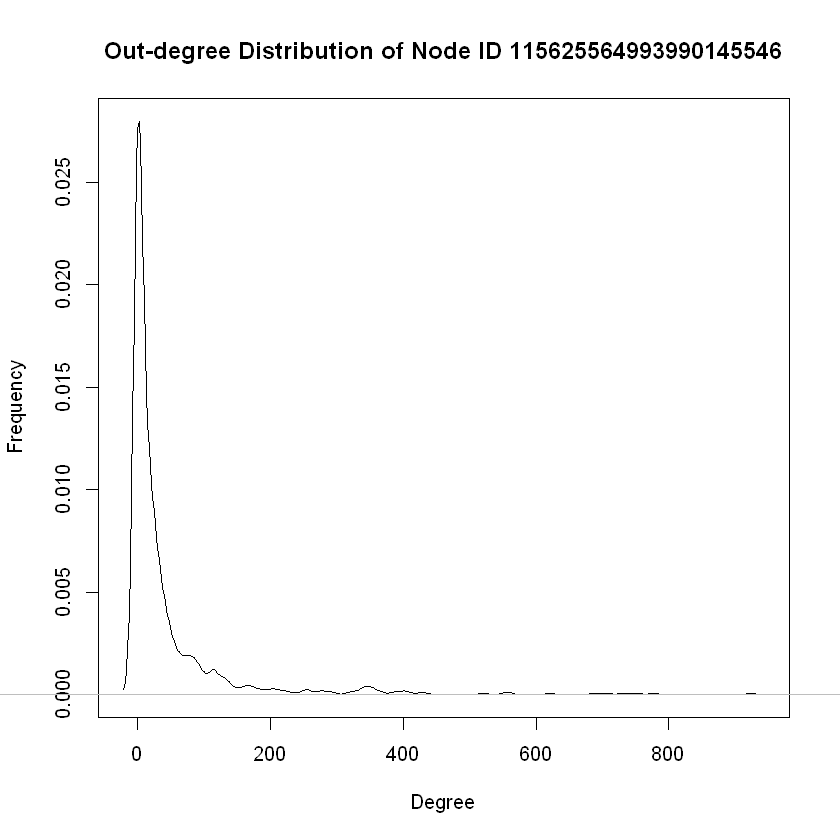

Modularity score of Node ID 115625564993990145546 : 0.319472551345825

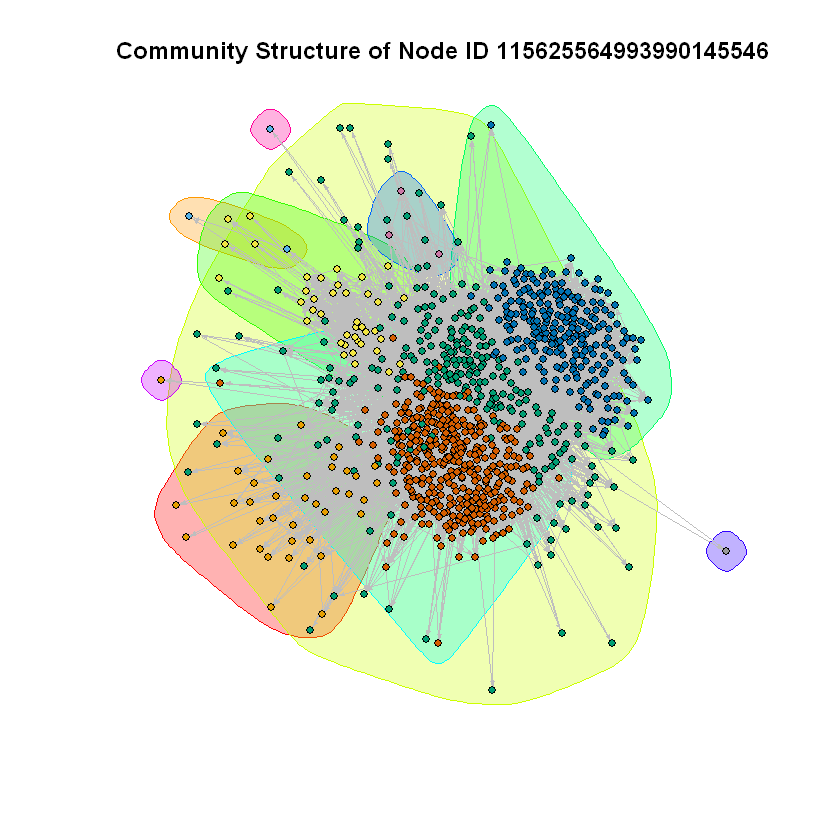

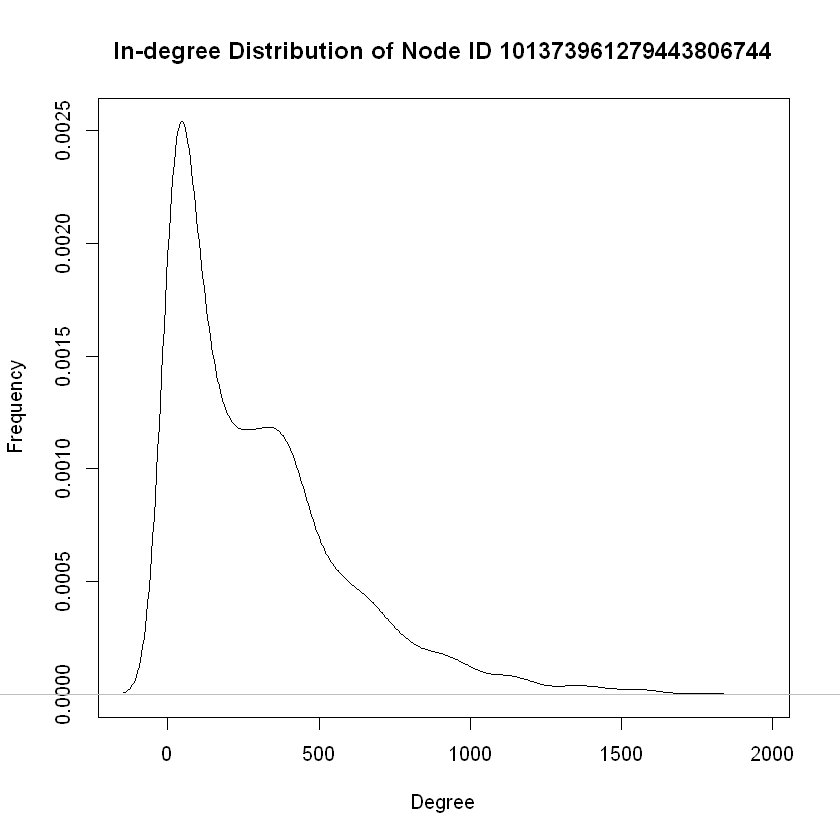

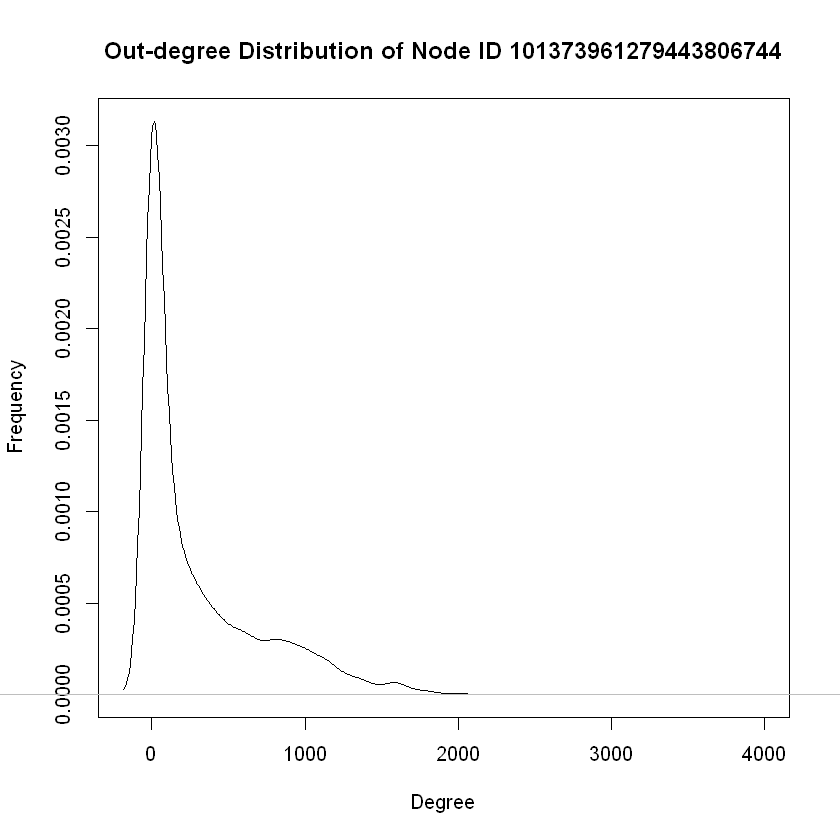

Modularity score of Node ID 101373961279443806744 : 0.191090270876884

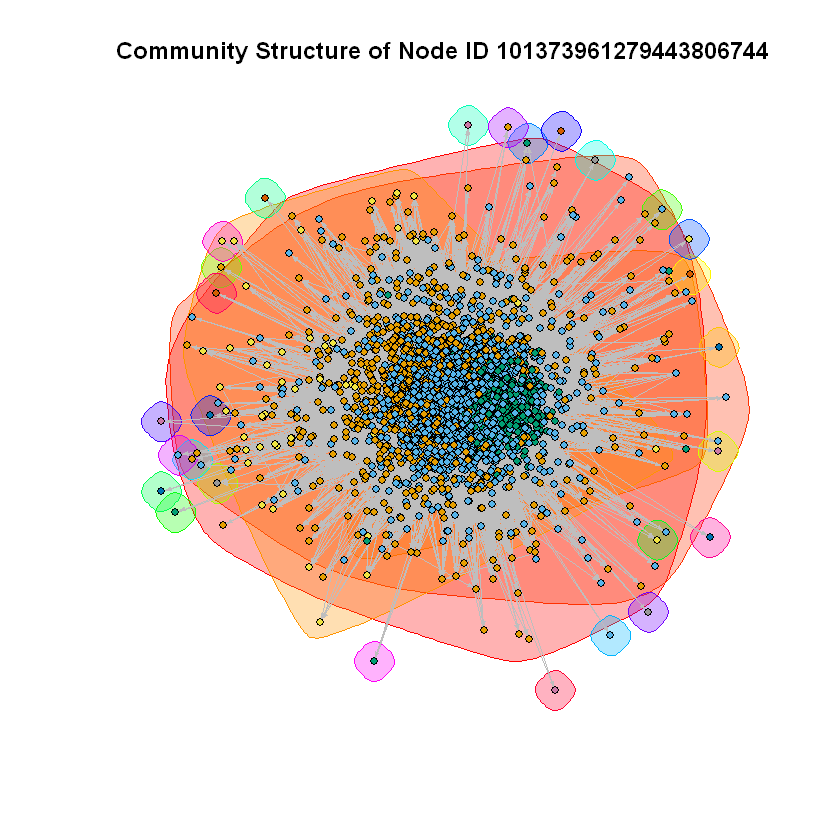

In [4]:
ids = c("109327480479767108490", "115625564993990145546", "101373961279443806744")
for (id in ids) {
    file = paste("gplus/", id, ".edges", sep="")
    graph = read_graph(file, format="ncol", directed=TRUE)
    graph = add_vertices(graph, nv=1, name=id)
    idx = which(V(graph)$name==id)
    edge_list = c()
    for (vertex in 1:(vcount(graph)-1)) {
        edge_list = c(edge_list, c(idx, vertex))
    }
    graph = add_edges(graph, edge_list)
    
    # Question 19
    plot(density(degree(graph, mode='in')), type="l", main=paste("In-degree Distribution of Node ID", id),
         xlab="Degree", ylab="Frequency")
    plot(density(degree(graph, mode='out')), type="l", main=paste("Out-degree Distribution of Node ID", id),
         xlab="Degree", ylab="Frequency")
    
    # Question 20
    community = cluster_walktrap(graph)
    modularity_score = modularity(community)
    
    plot(community, graph, main=paste("Community Structure of Node ID", id), vertex.label=NA,
         vertex.size=3, edge.arrow.size=.2, edge.color="grey", layout=layout.fruchterman.reingold)
    cat(paste("Modularity score of Node ID", id, ":", modularity_score))
}

### Question 21,22

SEE Q21 IN REPORT

In [148]:
cat ("--------REPORT-------\n")
for (id in ids){
    cat ("\nNode ID: ", id)
    
    # extract circles
    circles_file = paste("gplus/", id, ".circles", sep="")
    circles_file_content = readLines(circles_file) #each line represents a circle
    num_circles = length(circles_file_content)
    cat("\nThe number of circles: ",num_circles,"\n")
    
    
    # compute C, C_i and a_i
    circles = list()
    num_people_in_circle = c()
    for (i in 1:num_circles){
        circle_nodes = strsplit(circles_file_content[i],"\t")
        circle_content = list(circle_nodes[[1]][-1])
        ## a_i- the number of people in circle C_i
        a_i = length(circle_content[[1]])
        num_people_in_circle = c(num_people_in_circle,a_i)
        ## C_i- circle in the set of circles C
        circles = c(circles, circle_content)
    }
    cat("The number of people in each circle [a_i] is: ",num_people_in_circle,"\n")
    
    
    # compute N and H(C)
    all_circles = c()
    total_num_people = c()
    for (circle in circles){
        all_circles = c(all_circles, circle)
    }
    ## N- the totle num of people w/ circle info
    all_circles = unique(all_circles)
    total_num_people = c(length(all_circles))
    cat("The total number of people in all circles [N] is: ",total_num_people,"\n")
    ## H(C)- the entropy of circle
    #H_C = -1 * sum((num_people_in_circle/total_num_people) * log(num_people_in_circle/total_num_people))
   # cat("The entropy of circle [H(C)] is: ",H_C,"\n")
    
    
    # extract edges and community structure
    edges_file = paste("gplus/", id, ".edges", sep="")
    graph = read_graph(edges_file, format="ncol", directed=TRUE)
    graph = add_vertices(graph, nv=1, name=id)
    idx = which(V(graph)$name==id)
    edge_list = c()
    for (vertex in 1:(vcount(graph)-1)) {
        edge_list = c(edge_list, c(idx, vertex))
    }
    graph = add_edges(graph, edge_list)
    community = cluster_walktrap(graph)
    
    
    # compute b_i, H(K), H(C|K), H(K|C)
    num_com = length(community)
    num_people_in_com_with_cir = c()
    num_people_Kj_Ci = c()
    H_K = 0
    H_CK = 0
    H_KC = 0
    for (j in 1:num_com){
        b_i = length(intersect(community[[j]],all_circles))
        if (b_i != 0){
            H_K = H_K - (b_i/total_num_people) * log(b_i/total_num_people)
        }
        num_people_in_com_with_cir = c(num_people_in_com_with_cir,b_i)
        
        for (i in 1:num_circles){
            a_i = length(circles[[i]])
            A_ji = length(intersect(community[[j]],circles[[i]]))
            num_people_Kj_Ci = c(num_people_Kj_Ci, A_ji)
            if (A_ji != 0){
                H_CK = H_CK - (A_ji/total_num_people) * log(A_ji/b_i)
                H_KC = H_KC - (A_ji/total_num_people) * log(A_ji/a_i)
        }
        }
        
    }
    
    ## b_i- the number of people in community K_i with circle information
    #print(length(num_people_in_com_with_cir))
    cat("The number of people in community K_i with circle information [b_i] is: ",num_people_in_com_with_cir,"\n")
    ## A_ji- the number of people belonging to community j and circle i
    #print(length(num_people_Kj_Ci))
    cat("The number of people belonging to community j and circle i [A_ji] is: ",num_people_Kj_Ci,"\n")
    
    ## H(C)- the entropy of circle
    H_C = -1 * sum((num_people_in_circle/total_num_people) * log(num_people_in_circle/total_num_people))
    cat("The entropy of circle [H(C)] is: ",H_C,"\n")
    ## H(K)- the entropy of community
    cat("The entropy of community [H(K)] is: ",H_K,"\n")
    ## H(C|K)- the conditional entroph of circle
    cat("The conditional entropy of community [H(C|K)] is: ",H_CK,"\n")
    ## H(K|C)- the conditional entroph of community
    cat("The conditional entropy of community [H(K|C)] is: ",H_KC,"\n")
    
    
    # compute homogenity and completeness
    ## h
    h =  1 - (H_CK/H_C)
    cat("The homogeneity [h] is: ",h,"\n")
    ## c
    c = 1 - (H_KC/H_K)
    cat("The completeness [c] is: ",c,"\n")

    cat("\n------------------")
}

    

--------REPORT-------

Node ID:  109327480479767108490
The number of circles:  3 
The number of people in each circle [a_i] is:  330 346 419 
The total number of people in all circles [N] is:  764 
The number of people in community K_i with circle information [b_i] is:  279 397 75 13 
The number of people belonging to community j and circle i [A_ji] is:  251 267 13 4 4 393 75 75 0 0 0 13 
The entropy of circle [H(C)] is:  1.050779 
The entropy of community [H(K)] is:  1.005208 
The conditional entropy of community [H(C|K)] is:  0.1556361 
The conditional entropy of community [H(K|C)] is:  0.6736162 
The homogeneity [h] is:  0.8518851 
The completeness [c] is:  0.3298739 

------------------
Node ID:  115625564993990145546
The number of circles:  31 
The number of people in each circle [a_i] is:  6 9 169 276 325 93 73 338 46 62 338 255 485 7 260 363 188 327 314 48 489 276 79 373 67 10 354 73 300 362 102 
The total number of people in all circles [N] is:  727 
The number of people in com

In [158]:
cat ("--------REPORT-------\n")
for (id in ids){
    cat ("\nNode ID: ", id)
    
    # extract circles
    circles_file = paste("gplus/", id, ".circles", sep="")
    circles_file_content = readLines(circles_file) #each line represents a circle
    num_circles = length(circles_file_content)
    cat("\nThe number of circles: ",num_circles,"\n")
    
    
    # compute C, C_i and a_i
    circles = list()
    num_people_in_circle = c()
    for (i in 1:num_circles){
        circle_nodes = strsplit(circles_file_content[i],"\t")
        circle_content = list(circle_nodes[[1]][-1])
        ## a_i- the number of people in circle C_i
        a_i = length(circle_content[[1]])
        num_people_in_circle = c(num_people_in_circle,a_i)
        ## C_i- circle in the set of circles C
        circles = c(circles, circle_content)
    }
    cat("The number of people in each circle [a_i] is: ",num_people_in_circle,"\n")
    
    
    # compute N and H(C)
    all_circles = c()
    total_num_people = c()
    for (circle in circles){
        all_circles = c(all_circles, circle)
    }
    ## N- the totle num of people w/ circle info
    all_circles = unique(all_circles)
    total_num_people = c(length(all_circles))
    cat("The total number of people in all circles [N] is: ",total_num_people,"\n")

    
    # extract edges and community structure
    edges_file = paste("gplus/", id, ".edges", sep="")
    graph = read_graph(edges_file, format="ncol", directed=TRUE)
    graph = add_vertices(graph, nv=1, name=id)
    idx = which(V(graph)$name==id)
    edge_list = c()
    for (vertex in 1:(vcount(graph)-1)) {
        edge_list = c(edge_list, c(idx, vertex))
    }
    graph = add_edges(graph, edge_list)
    community = cluster_walktrap(graph)
    
    
    # compute b_i, A_ji
    num_com = length(community)
    num_people_in_com_with_cir = c()
    num_people_Kj_Ci = c()
    H_K = 0
    H_CK = 0
    H_KC = 0
    for (j in 1:num_com){
        b_i = length(intersect(community[[j]],all_circles))
        num_people_in_com_with_cir = c(num_people_in_com_with_cir,b_i)
        for (i in 1:num_circles){
            A_ji = length(intersect(community[[j]],circles[[i]]))
            num_people_Kj_Ci = c(num_people_Kj_Ci, A_ji)
            if (A_ji != 0){
                H_CK = H_CK - (A_ji/total_num_people) * log(A_ji/b_i)
        }
        }
        
    }
    
    for (i in 1:num_circles){
        a_i = length(circles[[i]])
        for (j in 1:num_com){
            A_ji = length(intersect(community[[j]],circles[[i]]))
            num_people_Kj_Ci = c(num_people_Kj_Ci, A_ji)
            if (A_ji != 0){
                H_KC = H_KC - (A_ji/total_num_people) * log(A_ji/a_i)
        }
        }
        
    }    
    
    ## b_i- the number of people in community K_i with circle information
    cat("The number of people in community K_i with circle information [b_i] is: ",num_people_in_com_with_cir,"\n")
    ## A_ji- the number of people belonging to community j and circle i
    cat("The number of people belonging to community j and circle i [A_ji] is: ",num_people_Kj_Ci,"\n")
    
    
    # compute entropy
    ## H(C)- the entropy of circle
    H_C = -1 * sum((num_people_in_circle/total_num_people) * log(num_people_in_circle/total_num_people))
    cat("The entropy of circle [H(C)] is: ",H_C,"\n")
    
    ## H(K)- the entropy of community
    b_i_w_nonzero = num_people_in_com_with_cir[num_people_in_com_with_cir!=0]
    H_K = -1 * sum((b_i_w_nonzero/total_num_people) * log(b_i_w_nonzero/total_num_people))
    cat("The entropy of community [H(K)] is: ",H_K,"\n")
    
    
    # compute conditional entropy
    ## H(C|K)- the conditional entroph of circle
    cat("The conditional entropy of community [H(C|K)] is: ",H_CK,"\n")
    ## H(K|C)- the conditional entroph of community  
    cat("The conditional entropy of community [H(K|C)] is: ",H_KC,"\n")
    
    
    # compute homogenity and completeness
    ## h
    h =  1 - (H_CK/H_C)
    cat("The homogeneity [h] is: ",h,"\n")
    ## c
    c = 1 - (H_KC/H_K)
    cat("The completeness [c] is: ",c,"\n")

    cat("\n------------------")
}

    

--------REPORT-------

Node ID:  109327480479767108490
The number of circles:  3 
The number of people in each circle [a_i] is:  330 346 419 
The total number of people in all circles [N] is:  764 
The number of people in community K_i with circle information [b_i] is:  279 397 75 13 
The number of people belonging to community j and circle i [A_ji] is:  251 267 13 4 4 393 75 75 0 0 0 13 251 4 75 0 267 4 75 0 13 393 0 13 
The entropy of circle [H(C)] is:  1.050779 
The entropy of community [H(K)] is:  1.005208 
The conditional entropy of community [H(C|K)] is:  0.1556361 
The conditional entropy of community [H(K|C)] is:  0.6736162 
The homogeneity [h] is:  0.8518851 
The completeness [c] is:  0.3298739 

------------------
Node ID:  115625564993990145546
The number of circles:  31 
The number of people in each circle [a_i] is:  6 9 169 276 325 93 73 338 46 62 338 255 485 7 260 363 188 327 314 48 489 276 79 373 67 10 354 73 300 362 102 
The total number of people in all circles [N] is: